
# Descriptive Analysis of MBA Students data
***
## Analysis of a Single Variable


### Data Import

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('titanic.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analysis of a Single Categorical Variable
### Frequency Distribution
***
### Analysis of People Survived

In [12]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
freq_table = df["Survived"].value_counts().to_frame()
freq_table.reset_index(inplace=True) # reset index
freq_table.columns = [   "Survived"   , 'Cnt_people'] # rename columns
freq_table["Pct_people"] = freq_table['Cnt_people'] / sum(freq_table['Cnt_people'])
freq_table

,Survived,Cnt_people,Pct_people
0,0,549,0.616162
1,1,342,0.383838


### Bar Plot

<BarContainer object of 2 artists>

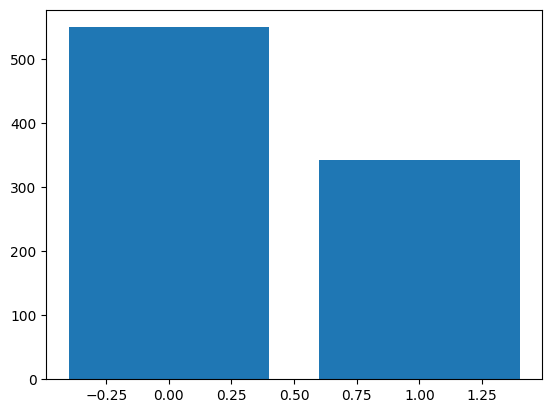

In [14]:
# Simple one line syntax to make bar plot
plt.bar(freq_table['Survived'], freq_table['Cnt_people']) 

### Pie Plot - Analysis of Class 

In [17]:
class_freq_table = df["Pclass"].value_counts().to_frame()
class_freq_table.reset_index(inplace=True) # reset index
class_freq_table.columns = [   "Pclass"   , 'Cnt_people'] # rename columns

In [19]:
class_freq_table

,Pclass,Cnt_people
0,3,491
1,1,216
2,2,184


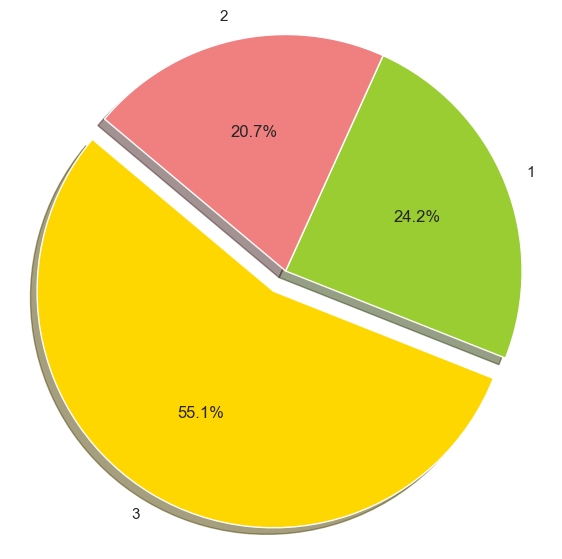

In [21]:
plt.figure(figsize=(7,7))
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(class_freq_table['Cnt_people'],
        labels=class_freq_table['Pclass'],
        explode=explode,  
        colors=colors,
        autopct='%1.1f%%', 
        shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Analysis of Single Categorical Variable | Graduation Degree

In [30]:
freq_grad_deg = df['Age'].value_counts()
freq_grad_deg.count()

88

In [31]:
freq_grad_deg

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

### Create Age Category

* Age <= 10 : "Kid" 
* Age 11 - 18 : "Teenage"
* Age 18-60 : Adult
* Age >= 60 : Senior


In [32]:
# Age Category
def fn_grad_deg_recat(x):
    ## To Do 
    
        return 

In [34]:
df['age_category'] = df['Age'].map(fn_grad_deg_recat)
freq_grad_deg = df['age_category'].value_counts().to_frame()
freq_grad_deg.reset_index(inplace=True) # reset index
freq_grad_deg.columns = [   "Age category"   , 'Cnt_people'] # rename columns
freq_grad_deg["Pct_People"] = freq_grad_deg['Cnt_people'] / sum(freq_grad_deg['Cnt_people'])
freq_grad_deg

In [ ]:
## Plot

# Analysis of a Single Continuous Variable
***
## Histograms & Density Plots

In [35]:
grades_mean = round(df["Fare"].mean(),1)
grades_median = round(df["Fare"].median(),1)
grades_min = round(df["Fare"].min(),1)
grades_max = round(df["Fare"].max(),1)
grades_std = round(np.std(df["Fare"]),1)

In [37]:
print("Mean fare of  is :" , grades_mean)
print("Median fare of   is :" , grades_median)
print("Min fare of is :" , grades_min)
print("Max fare of  is :" , grades_max)
print("Std. Dev of fare is :" , grades_std)

Mean fare of  is : 32.2
Median fare of   is : 14.5
Min fare of is : 0.0
Max fare of  is : 512.3
Std. Dev of fare is : 49.7


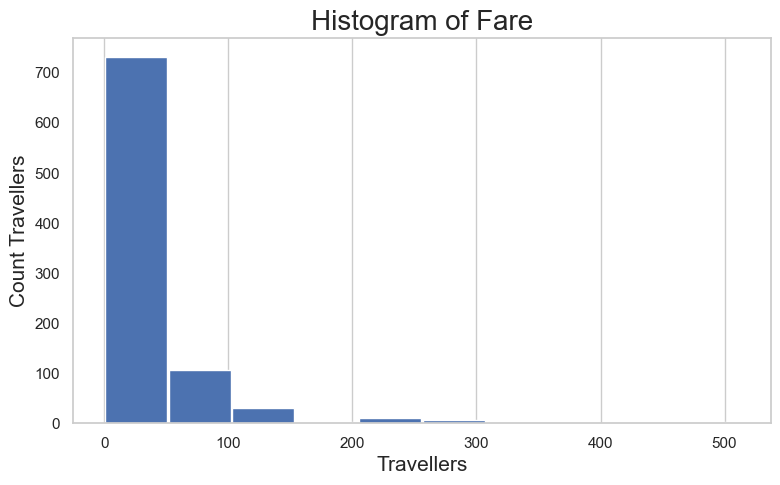

In [38]:
plt.figure(figsize=(9,5))
plt.hist(df['Fare'], rwidth = 0.98)

plt.title("Histogram of Fare", fontsize=20)
plt.xlabel('Travellers', fontsize=15)
plt.ylabel('Count Travellers', fontsize=15)
plt.grid(axis='y')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


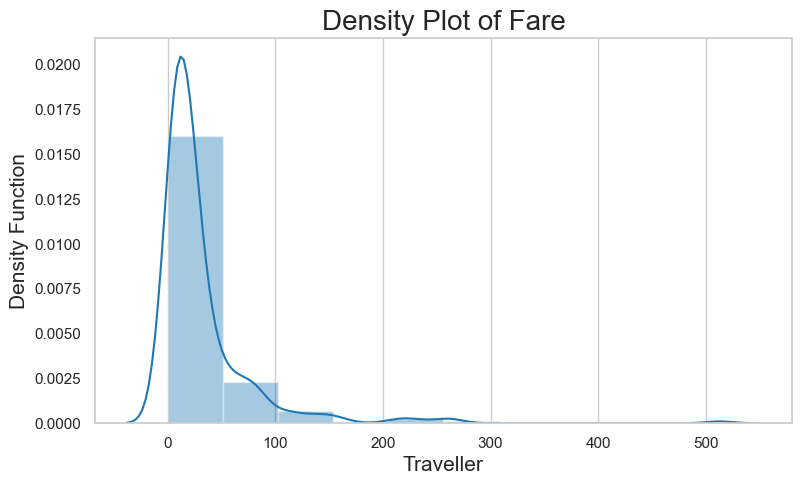

In [40]:
plt.figure(figsize=(9,5))
sns.distplot(df['Fare'],            
             hist = True, bins=10, 
             kde=True, color='#1F78B4'
            )
## KDE stands for Kernel Density Estimate

plt.title("Density Plot of Fare", fontsize=20)
plt.xlabel('Traveller', fontsize=15)
plt.ylabel('Density Function', fontsize=15)
plt.grid(axis='y')

Text(0.5, 0, 'Travellers')

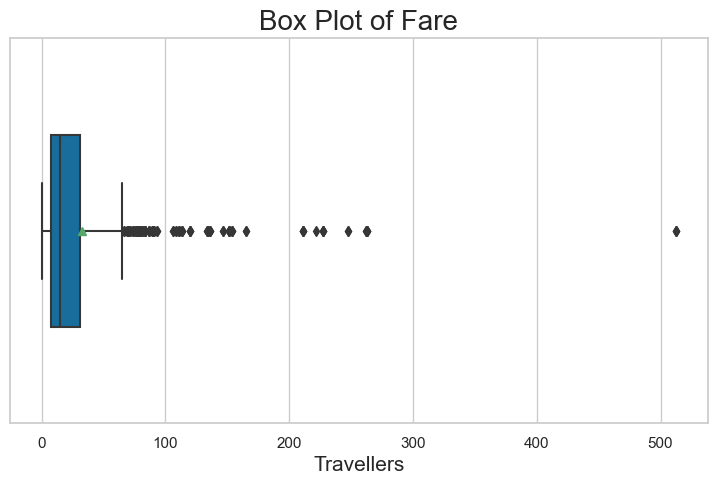

In [41]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(x='Fare',
                 data=df, showmeans=True,
                 width=0.5, 
                 palette="colorblind")
plt.title("Box Plot of Fare", fontsize=20)
plt.xlabel('Travellers', fontsize=15)

## Percentile Distribution

In [42]:
# Get the percentile distribution of the students grade
df['Fare'].quantile([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).to_frame().T

,0.00,0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99,1.00
Fare,0.0,0.0,7.225,7.55,7.9104,14.4542,31.0,77.9583,112.07915,249.00622,512.3292


# Thank you 


In [ ]:
# pip pandas-profiling

In [45]:

import pandas_profiling as pp
report = pp.ProfileReport(mba_df, minimal=True)
report.to_file("Tittanice_analysis_report.html")